<a href="https://colab.research.google.com/github/MUHAMMADALYAN/Natural-Language-Processing-in-TensorFlow/blob/master/Text_generation_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text generation using NLP

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)

# create input sequences using list of tokens
#now breaking each sentence ino pharases [first word,sec word],[fir word,sec word,third word]....
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]# tokenize setence indviduay
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]#[first word,sec word],[fir word,sec word,third word]....
		input_sequences.append(n_gram_sequence)#[ [first word,sec word],[fir word,sec word,third word].... ]


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])#converting each pharase to max length of sentence
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) #padding is pre to get labels from last

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]#[:,:-1] t is used for indexing in multi dim array[,] -1 is used for last element

label = ku.to_categorical(label, num_classes=total_words) # it will assign 1 to index of label and assign zero to remaining wrds

--2020-06-01 14:56:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-06-01 14:56:03 (61.8 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 13s 27ms/step - loss: 6.9070 - accuracy: 0.0205
Epoch 2/100
484/484 [==============================] - 13s 27ms/step - loss: 6.5038 - accuracy: 0.0202
Epoch 3/100
484/484 [==============================] - 13s 27ms/step - loss: 6.4004 - accuracy: 0.0254
Epoch 4/100
484/484 [==============================] - 13s 27ms/step - loss: 6.2704 - accuracy: 0.0302
Epoch 5/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1790 - accuracy: 0.0374
Epoch 6/100
484/484 [==============================] - 13s 27ms/step - loss: 6.0985 - accuracy: 0.0380
Epoch 7/100
484/484 [==============================] - 13s 27ms/step - loss: 6.0251 - accuracy: 0.0400
Epoch 8/100
484/484 [==============================] - 13s 27ms/step - loss: 5.9462 - accuracy: 0.0446
Epoch 9/100
484/484 [==============================] - 13s 27ms/step - loss: 5.8510 - accuracy: 0.0521
Epoch 10/100
484/484 [==============================] - 13s 27ms/step - l

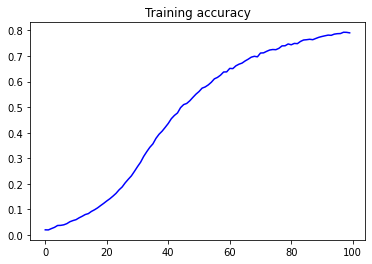

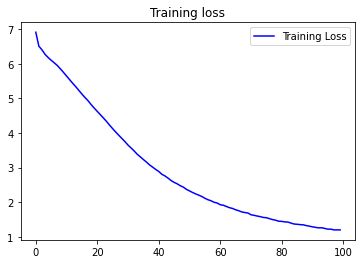

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')#-1 is for removing abel
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word # now combining word with previous sentence and use new sentence to make new perdiction
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope both such new part full of mind 'tis true more word might none grew constant part of afloat wanting pain none you was not so bold press for most part such friend and thee none belong belong live rare near fullness thee was doubt doubt none rare rare free kill me hate made afloat nature's blessed hate lies go fix'd in youth young hate pain muse have bright thy heart old old delight ' add or both need seen some fall on memory hate words survey told what tongue so dearer rhyme rhyme pace burn'd clearer doom or date mind
